In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 課題1
## 2変数正規分布に従う乱数をプロットする
- そのままプロット
- 標準化してプロット
    - サンプルからのμ, Σを使用して計算
    - パラメータからのμ, Σを使用して計算
- 無相関化してプロット

In [8]:
def standardize(data, mean=None, cov=None):
    if mean is None:
        mean = data.mean(axis=0)

    if cov is None:
        cov = np.cov(data.T)

    return (data - mean) / np.sqrt(np.diag(cov))


def decorrelate(data):
    cov = np.cov(data.T)
    la, eig_s = np.linalg.eig(cov)
    return np.dot(eig_s.T, data.T).T


def plot_data(data, title):
    print(title)
    print(f'平均:\n{data.mean(axis=0)}\n')
    print(f'共分散行列:\n{np.cov(data.T)}\n')
    sns.jointplot(data[:, 0], data[:, 1], s=15)
    plt.show()

In [9]:
def transform(data, title, method, mean, sigma):
    if method is None:
        return data
    
    if title == 'standardization(parameter\'s μ, Σ)':
        return method(data, mean, sigma)

    return method(data)


methods = {'original': None,
           'standardization(sample\'s μ, Σ)': standardize,
           'standardization(parameter\'s μ, Σ)': standardize,
           'decorrelation': decorrelate}

In [10]:
def create_data():
    mean = np.array([-5, -5])
    sigma = np.array([[5, -3], [-3, 5]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data1 = {'mean': mean, 'sigma': sigma, 'sample': sample}

    mean = np.array([0, 0])
    sigma = np.array([[15, 3], [3, 4]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data2 = {'mean': mean, 'sigma': sigma, 'sample': sample}

    mean = np.array([5, 5])
    sigma = np.array([[4, 10], [10, 15]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data3 = {'mean': mean, 'sigma': sigma, 'sample': sample}
    
    return np.array([data1, data2, data3])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


{'mean': array([-5, -5]), 'sigma': array([[ 5, -3],
       [-3,  5]]), 'sample': array([[-5.90195414, -4.89307465],
       [-5.24666826, -6.82010891],
       [-5.68419386, -2.60853512],
       ...,
       [-6.5532768 , -1.7876175 ],
       [-6.37662464, -7.60942545],
       [-3.9359691 , -7.91497334]])}
original
平均:
[-4.96326914 -5.04506368]

共分散行列:
[[ 5.11766982 -3.04575453]
 [-3.04575453  5.03562558]]



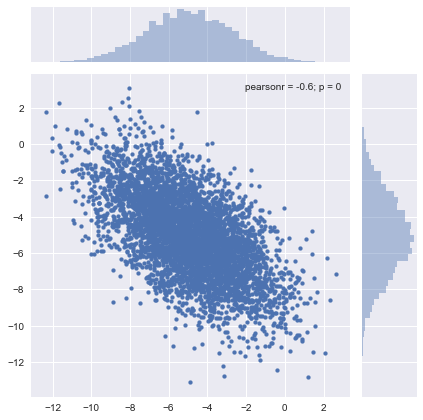

standardization(sample's μ, Σ)
平均:
[-4.46770398e-15 -3.49777984e-15]

共分散行列:
[[ 1.         -0.59997348]
 [-0.59997348  1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


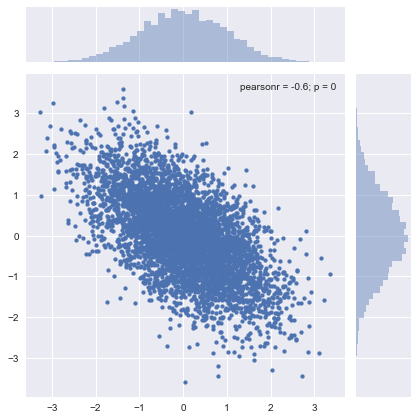

standardization(parameter's μ, Σ)
平均:
[ 0.01642654 -0.02015309]

共分散行列:
[[ 1.02353396 -0.60915091]
 [-0.60915091  1.00712512]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


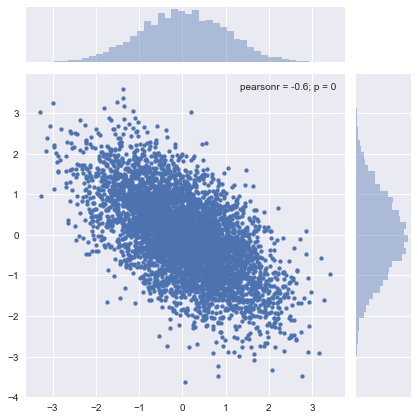

decorrelation
平均:
[ 0.01018095 -7.07718902]

共分散行列:
[[ 8.12267847e+00 -1.52077679e-15]
 [-1.52077679e-15  2.03061693e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


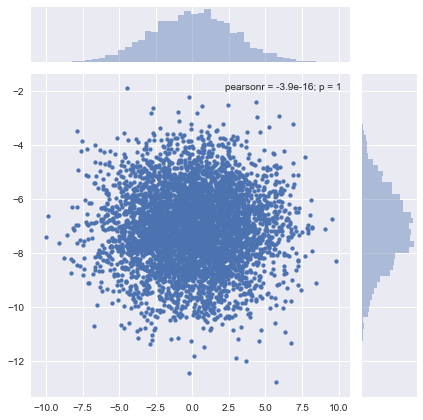

{'mean': array([0, 0]), 'sigma': array([[15,  3],
       [ 3,  4]]), 'sample': array([[-4.07940881, -0.75490104],
       [ 0.41429465, -0.4099877 ],
       [ 9.09956791,  6.9340282 ],
       ...,
       [-3.18530905, -1.21747289],
       [-3.07853532, -3.05620542],
       [ 1.65685857, -0.53841106]])}
original
平均:
[-0.07862857 -0.08240712]

共分散行列:
[[15.12133846  3.19912718]
 [ 3.19912718  4.18549165]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


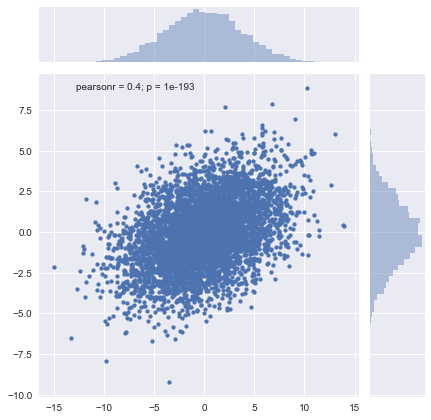

standardization(sample's μ, Σ)
平均:
[-1.83741911e-17  4.47530901e-17]

共分散行列:
[[1.         0.40212692]
 [0.40212692 1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


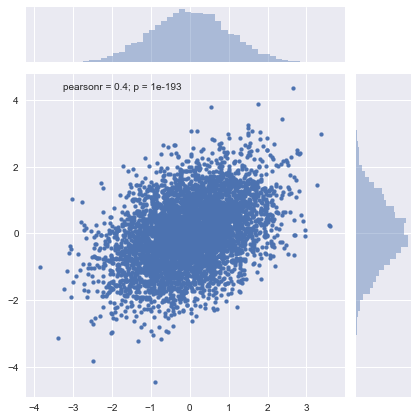

standardization(parameter's μ, Σ)
平均:
[-0.02030181 -0.04120356]

共分散行列:
[[1.00808923 0.41300554]
 [0.41300554 1.04637291]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


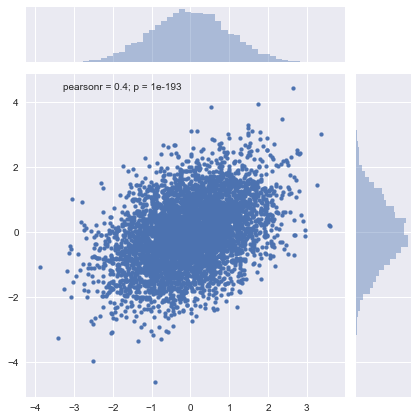

decorrelation
平均:
[-0.09744847 -0.05896762]

共分散行列:
[[ 1.59884447e+01 -3.73464901e-16]
 [-3.73464901e-16  3.31838537e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


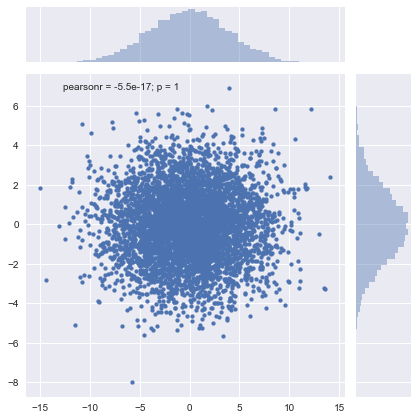

{'mean': array([5, 5]), 'sigma': array([[ 4, 10],
       [10, 15]]), 'sample': array([[5.31764282, 6.09552743],
       [2.82906897, 2.8005153 ],
       [2.48654448, 3.14445202],
       ...,
       [5.78914046, 4.43734019],
       [3.29661047, 3.62929206],
       [4.44722516, 2.96648577]])}
original
平均:
[4.98624802 4.995735  ]

共分散行列:
[[ 6.88359785  8.38346342]
 [ 8.38346342 16.01898989]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


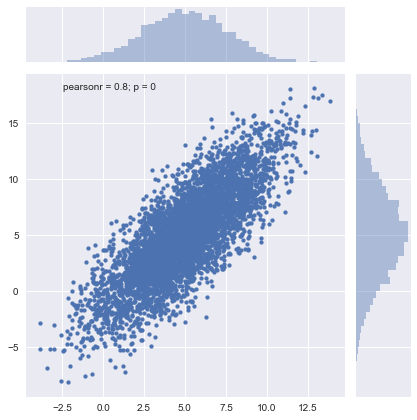

standardization(sample's μ, Σ)
平均:
[-2.55540034e-16  3.45863338e-15]

共分散行列:
[[1.         0.79835889]
 [0.79835889 1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


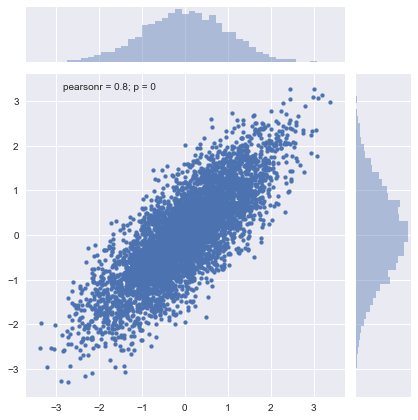

standardization(parameter's μ, Σ)
平均:
[-0.00687599 -0.00110122]

共分散行列:
[[1.72089946 1.08230047]
 [1.08230047 1.06793266]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


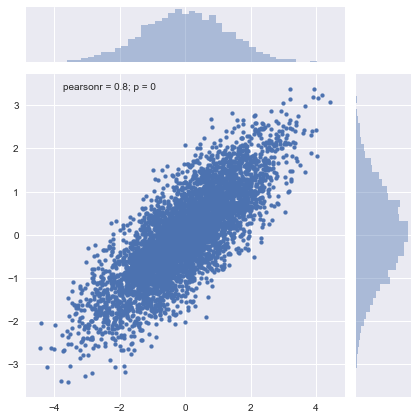

decorrelation
平均:
[-1.73591913 -6.84153654]

共分散行列:
[[ 1.90423643e+00 -2.27348091e-15]
 [-2.27348091e-15  2.09983513e+01]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


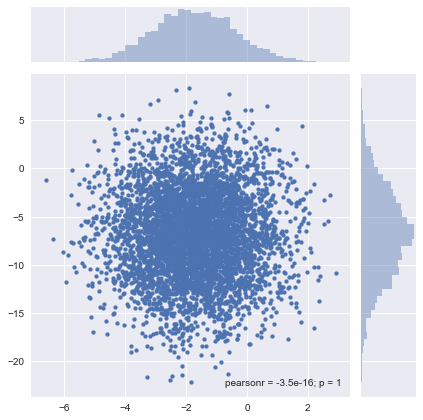

In [11]:
data = create_data()

for i in data:
    print(i)
    for title, method in methods.items():
        transformed_data = transform(i['sample'], title, method, i['mean'], i['sigma'])
        plot_data(transformed_data, title)

# 課題2
## 多変数正規分布の混合分布と、その識別境界をプロットする

In [14]:
a = np.random.randint(1, 3, 10000)
distribution1_count = len(a[a == 1])
distribution2_count = len(a[a == 2])

mean1 = np.array([-5, 5])
sigma1 = np.array([[10, 2], [2, 4]])
data = np.random.multivariate_normal(mean1, sigma1, distribution1_count)

mean2 = np.array([10, -5])
sigma2 = np.array([[15, 3], [3, 4]])
data = np.vstack((data, np.random.multivariate_normal(mean2, sigma2, distribution2_count)))

mixture_distribution
平均:
[2.39727721 0.08704216]

共分散行列:
[[ 68.98702334 -35.41306908]
 [-35.41306908  28.95910583]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


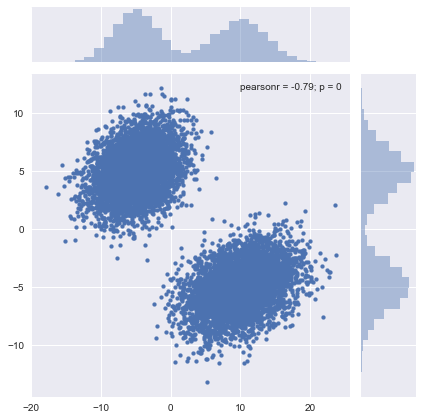

In [15]:
plot_data(data, 'mixture_distribution')

In [16]:
def calc_decision_surface(data):
    sigma1_inv = np.linalg.inv(sigma1)
    sigma2_inv = np.linalg.inv(sigma2)
    p_c1 = distribution1_count / len(data)
    p_c2 = distribution2_count / len(data)
    
    square_term = data.dot(sigma1_inv - sigma2_inv).dot(data.T)
    one_term = (2 * mean2.dot(sigma2_inv) - 2 * mean1.dot(sigma1_inv)).dot(data.T)
    const_term = 2 * np.log(p_c1 / p_c2) - np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2)) + mean1.dot(sigma1_inv)\
        .dot(mean1.T) - mean2.dot(sigma2_inv).dot(mean2.T)

    decision_surface = square_term + one_term + const_term
    return np.diag(decision_surface)


In [26]:
axis = np.linspace(data.min(axis=0).min(), data.max(axis=0).max(), 150)
# axis = np.linspace(-20, 26, 200)
x, y = np.meshgrid(axis, axis)
x_flat = x.flatten()
y_flat = y.flatten()
result = calc_decision_surface(np.vstack((x_flat, y_flat)).T)

(150, 150)


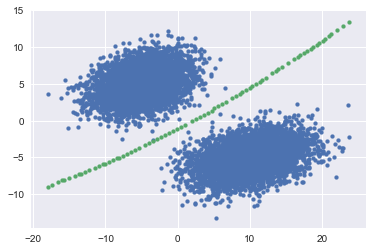

In [31]:
result = np.abs(result)
index = np.where(result < 0.5)
plt.scatter(data[:, 0], data[:, 1], s=15)
result_grid = result.reshape(len(x), len(y))
print(result_grid.shape)
# plt.contour(x, y, result_grid, levels=[0])
plt.scatter(x_flat[index], y_flat[index], s=15)